In [1]:
import xarray as xr
import xmitgcm
import datetime
import numpy as np
import matplotlib.pyplot as plt
from xgcm import Grid

To open the output, point this to the location where the output is located, and run it (it's ok if there is a warning)

In [3]:
ds = xmitgcm.open_mdsdataset('/scratch/user/spencerjones/deep_ekman/run/',prefix=['dyn'])
ds

/scratch/user/spencerjones/.conda/envs/grace1/lib/python3.9/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /scratch/user/spencerjones/deep_ekman/run/ or /scratch/user/spencerjones/deep_ekman/run/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


<xarray.Dataset>
Dimensions:               (time: 580, Z: 32, YC: 128, XG: 64, YG: 128, XC: 64, Zl: 32, Zp1: 33, Zu: 32, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35)
Coordinates: (12/37)
    iter                  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) timedelta64[ns] 0 days 04:10:00 ... 100 days...
  * XC                    (XC) >f4 0.5078 1.523 2.539 ... 62.46 63.48 64.49
  * YC                    (YC) >f4 -64.49 -63.46 -62.44 ... 63.46 64.49 65.51
  * XG                    (XG) >f4 -4.441e-16 1.016 2.031 ... 61.95 62.97 63.98
  * YG                    (YG) >f4 -65.0 -63.98 -62.95 ... 62.95 63.98 65.0
    ...                    ...
    dyU                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dxV                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    rhoRef                (Z) >f4 dask.array<chunksize=(32,), meta=np.ndarray>
  * layer_1RHO_bounds     (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
  * layer_1RHO_center     (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47
  * layer_1RHO_interface  (layer_1RHO_interface) >f4 29.0 29.5 ... 34.4 34.45
Data variables:
    UVEL                  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    VVEL                  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    WVEL                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    THETA                 (time, Z, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    SALT                  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    CONVADJ               (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...

Salinity in should be equal to salinity out so let's check that the salt drift is small

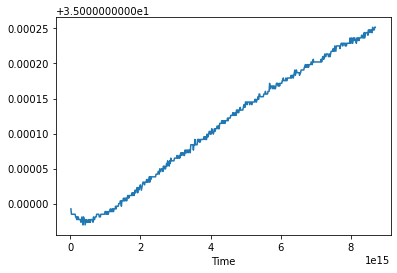

In [4]:
(((ds.SALT*ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z']))/(ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z'])).plot()

Now we want to know: is the ocean in equilibrium? We can plot a few things to help with this

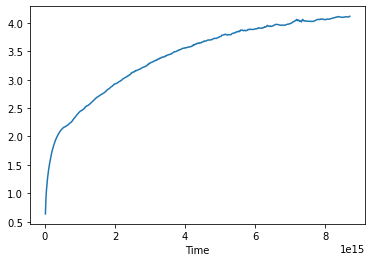

In [5]:
#the mean temperature
(((ds.THETA*ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z']))/(ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z'])).plot()

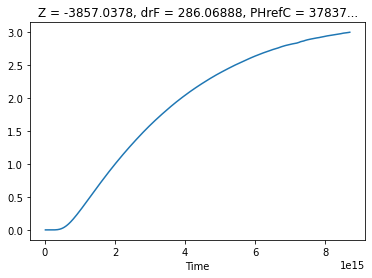

In [7]:
#the mean temperature in the bottom level
(((ds.THETA*ds.rA*ds.drF*ds.hFacC).isel(Z=-1).sum(['XC','YC']))/(ds.rA*ds.drF*ds.hFacC).isel(Z=-1).sum(['XC','YC'])).plot()

Let's also just plot the temperature at the surface

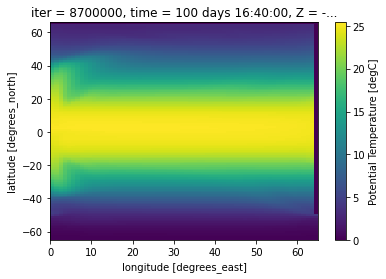

In [8]:
ds.THETA.isel(time=-1,Z=0).plot()

Now let's plot the vertical velocity at the bottom:

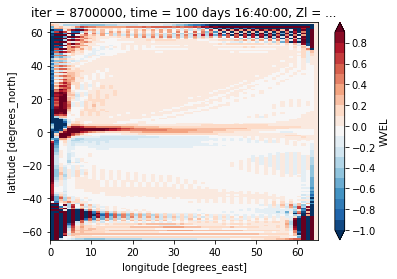

In [9]:
(ds.WVEL.isel(time=-1,Zl=-1)*10**6).plot(levels=np.arange(-1,1,0.1))

Now we're going to plot the streamfunction of the Meridional Overturning Circulation:

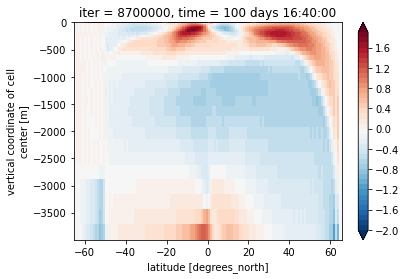

In [10]:
((ds.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC')/10**6).plot(levels=np.arange(-2,2,0.1))

I often find it quite useful to look at how this is changing too:

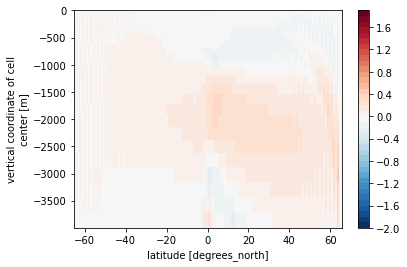

In [11]:
((ds.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC')/10**6-(ds.VVEL*ds.dxG*ds.drF).isel(time=-70).sum('XC')/10**6).plot(levels=np.arange(-2,2,0.1))